# Extensions of the Linear Model

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model as sk_lm
from sklearn import model_selection as sk_msel
from sklearn import metrics as sk_metrics
from sklearn import preprocessing as sk_pre
from sklearn import pipeline as pipe
import statsmodels.api as sm

### 1. Qualitative Predictors

In [3]:
df_credit=pd.read_csv('data/Credit.csv')

In [5]:
df_credit.drop(columns='Unnamed: 0', inplace=True)
df_credit.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [7]:
# Create Dummy variables for qualitative predictor Ethnicity
df_credit2=pd.get_dummies(df_credit, columns=['Ethnicity'])
df_credit2.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African American,Ethnicity_Asian,Ethnicity_Caucasian
0,14.891,3606,283,2,34,11,Male,No,Yes,333,0,0,1
1,106.025,6645,483,3,82,15,Female,Yes,Yes,903,0,1,0
2,104.593,7075,514,4,71,11,Male,No,No,580,0,1,0
3,148.924,9504,681,3,36,11,Female,No,No,964,0,1,0
4,55.882,4897,357,2,68,16,Male,No,Yes,331,0,0,1


In [8]:
# Fit model with predictors: Ethnicity: Asian and Caucasian (i.e. African American recognized as baseline)
lm=sm.OLS.from_formula('Balance ~ Ethnicity_Asian + Ethnicity_Caucasian', df_credit2).fit()

In [9]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                   0.04344
Date:                Sun, 16 Feb 2020   Prob (F-statistic):              0.957
Time:                        10:33:51   Log-Likelihood:                -3019.3
No. Observations:                 400   AIC:                             6045.
Df Residuals:                     397   BIC:                             6057.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             531.0000     46.319     11.464      0.000     439.939     622.061
Ethnicity_Asian       -18.6863     65.021     -0.287      0.774    -146.515     109.142
Ethnicity_Caucasian   -12.5025     56.681     -0.221      0.826    -123.935      98.930
==============================================================================
Omnibus:                       28.829   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.395
Skew:                           0.581   Prob(JB):                     1.13e-06
Kurtosis:                       2.460   Cond. No.                         4.39
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- **Interpretation**: Estimated Balance for Baseline (African American) is 531 Dollars. Asian have in average 18.7 and Caucasian in average 12.5 less debt.
- **Significance**: p-value for F-Test 0.96 -> No significant relationship, also individual p-values low

In [11]:
# Of course, can also use quantitative and qualitative predictors together
lm2=sm.OLS.from_formula('Balance ~ Income + Ethnicity_Asian + Ethnicity_Caucasian', df_credit2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     36.16
Date:                Sun, 16 Feb 2020   Prob (F-statistic):           1.13e-20
Time:                        10:40:49   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5950.
Df Residuals:                     396   BIC:                             5966.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept             242.4882     49.567      4.892      0.000     145.040     339.936
Income                  6.0507      0.581     10.410      0.000       4.908       7.193
Ethnicity_Asian         2.4566     57.723      0.043      0.966    -111.025     115.938
Ethnicity_Caucasian     6.6188     50.321      0.132      0.895     -92.312     105.549
==============================================================================
Omnibus:                       42.168   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.904
Skew:                           0.384   Prob(JB):                     2.89e-05
Kurtosis:                       2.185   Cond. No.                         222.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 2. Non-Additivity

- **Additivity Assumption of Linear Regression Model**: Effect of one Predictor on Response is independent of other predictors
- **Non-Additivity** is possible due to interaction effects (synergy) -> Illustration at the end of 3.1: Synergy of TV and Radio spendings
- Standard Linear Model: $y=\beta_0+\beta_1X_1+\beta_2X_2+\epsilon$ -> Increase by 1 of Predictor $X_1$ increases response $y$ by $\beta_1$, independent of other Predictor
- **Linear Model with Interaction Term**: $y=\beta_0+\beta_1X_1+\beta_2X_2+\beta_3X_1X_2+\epsilon$

In [13]:
df_ad=pd.read_csv('data/Advertising.csv')
df_ad.drop(columns='Unnamed: 0', inplace=True)
df_ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [21]:
# Fit model with interaction term
lm=sm.OLS.from_formula('Sales ~ TV + Radio + TV*Radio', df_ad).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          6.68e-146
Time:                        11:35:53   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TV:Radio       0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comments**:
- Model superior to additive model: higher $R^2$
- p-value of interaction term very low -> True relationship is non-additive
- All predictors here significant -> low p-values
- Note: If an interaction term has low p-value (significant interaction effect), then both predicitors should be included in the model, regardless of their p-value

In [22]:
# Predicted Sales based on Model with interaction term
sales_pre = lm.predict()
sales_pre[:5]

array([21.68638999, 10.6345456 ,  9.26121411, 17.63410793, 12.63691903])

Text(0.5, 0, 'Sales Residuals')

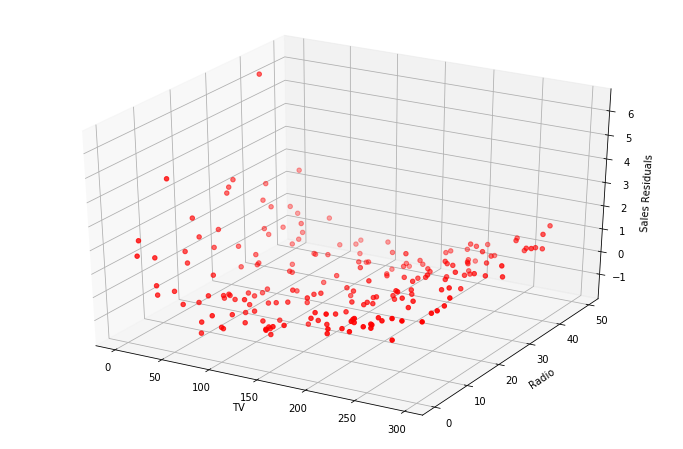

In [23]:
# Plot Residuals TV, Radio -> Sales
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ad['TV'], df_ad['Radio'], sales_pre - df_ad['Sales'], c='r', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales Residuals')

Somewhat better, but still some non-linearity present

### 3. Non-Linearity

In [45]:
# Fit model with interaction term and non-linearity in TV Predictor (log function)
lm2=sm.OLS.from_formula('Sales ~ TV + np.log(TV) + Radio + TV*Radio', df_ad).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                 1.461e+04
Date:                Sun, 16 Feb 2020   Prob (F-statistic):          2.43e-240
Time:                        12:00:51   Log-Likelihood:                -43.104
No. Observations:                 200   AIC:                             96.21
Df Residuals:                     195   BIC:                             112.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2310      0.177      1.302      0.194      -0.119       0.581
TV             0.0005      0.001      0.737      0.462      -0.001       0.002
np.log(TV)     1.9432      0.047     41.148      0.000       1.850       2.036
Radio          0.0467      0.003     16.087      0.000       0.041       0.052
TV:Radio       0.0010    1.7e-05     60.015      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   2.205
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.590
Skew:                           0.005   Prob(JB):                        0.745
Kurtosis:                       3.266   Cond. No.                     4.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**Comments**:
- Model superior to model with interaction term: higher $R^2$ (0.997) 
- p-value of quadratic term low
- All predictors here significant -> low p-values

In [46]:
# Predicted Sales based on Model with interaction term
sales_pre = lm2.predict()
sales_pre[:5]

array([21.53464846, 11.24396357,  8.71442904, 18.36158944, 12.91198654])

Text(0.5, 0, 'Sales Residuals')

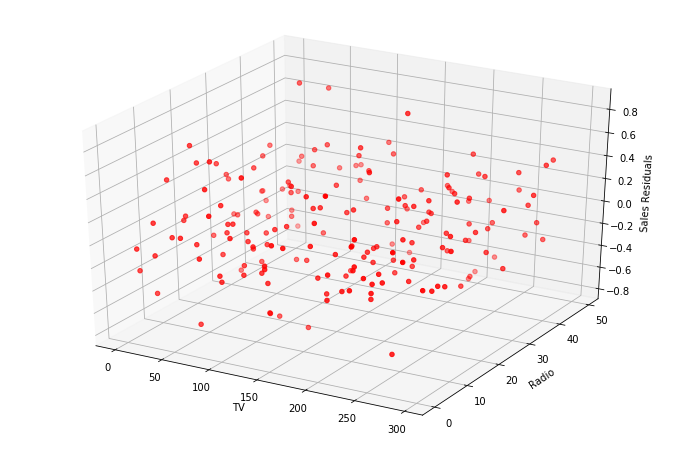

In [47]:
# Plot Residuals TV, Radio -> Sales
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_ad['TV'], df_ad['Radio'], sales_pre - df_ad['Sales'], c='r', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Radio')
ax.set_zlabel('Sales Residuals')

### 4. Residual Plots for Model Evaluation

Text(0, 0.5, 'Residuals')

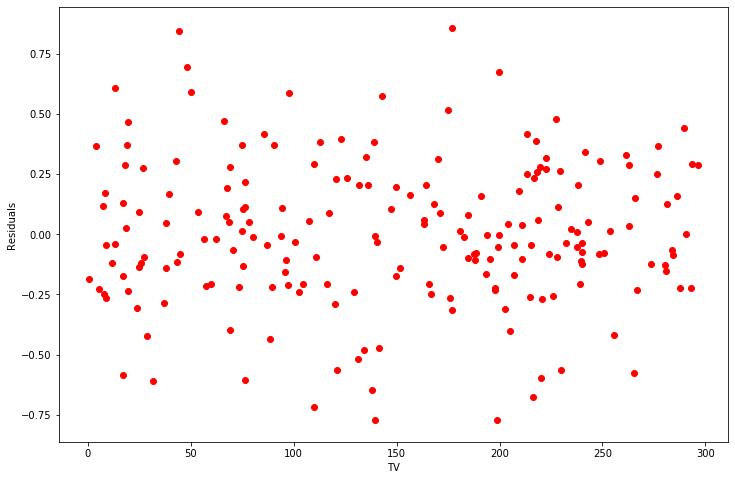

In [48]:
# Example: Residual Plot TV -> Sales
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(df_ad['TV'], sales_pre - df_ad['Sales'], c='r', marker='o')
ax.set_xlabel('TV')
ax.set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

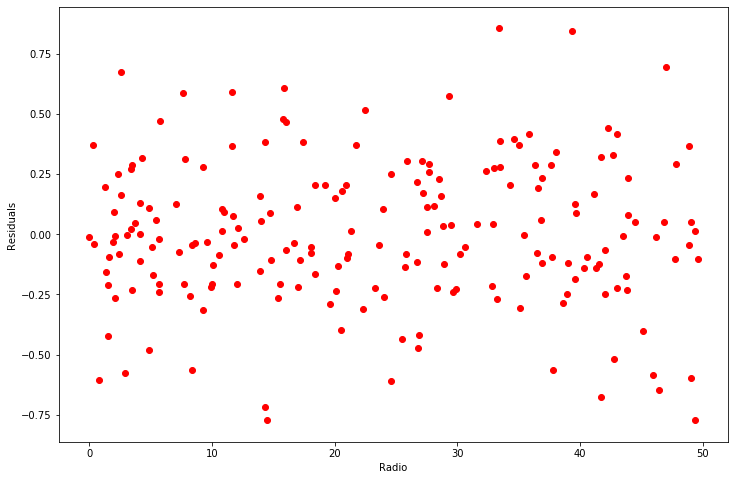

In [49]:
# Example: Residual Plot Radio -> Sales
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.scatter(df_ad['Radio'], sales_pre - df_ad['Sales'], c='r', marker='o')
ax.set_xlabel('Radio')
ax.set_ylabel('Residuals')

### 5. Collinearity

High correlation between factors reduces accuracy of estimates. Check correlation 

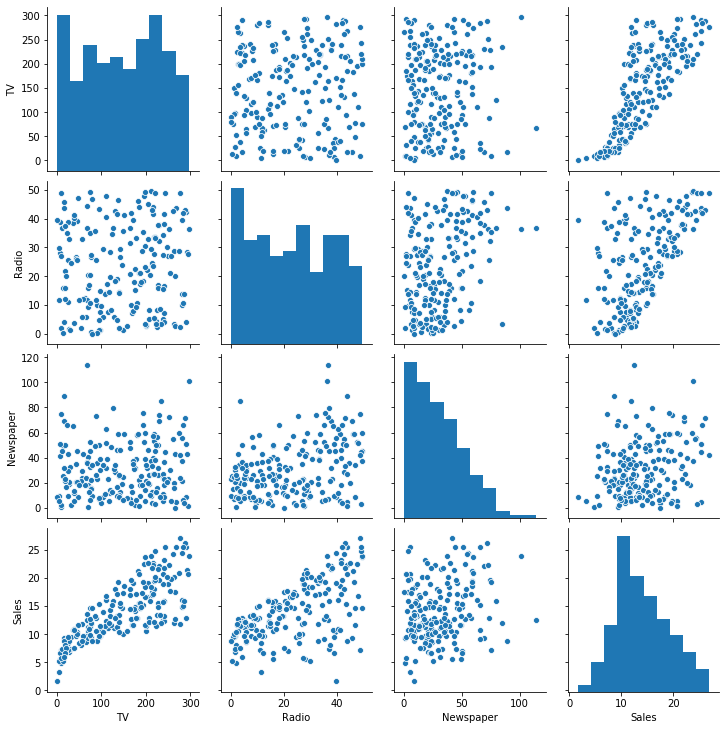

In [50]:
sns.pairplot(data=df_ad)